In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

### Контекст датасета:<br>
Данные о ценах на жилье в Бостоне, полученные Харрисоном Д. и Рубинфельдом Д.Л. «Гедонистические цены и спрос на чистый воздух», J. Environ. Экономика и менеджмент, том 5, 81–102, 1978, ссылка на датасет: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/data<br>
<br>
**Описание столбцов:**<br>
**CRIM** - уровень преступности на душу населения в сравнении по городам<br>
**ZN** - доля жилой земли, разделенной на участки площадью более 25 000 кв. футов<br>
**INDUS** - доля гектаров, не связанных с розничной торговлей, в расчете на один город<br>
**CHAS** - фиктивная переменная Чарльза-Ривера (1, если тракт граничит с рекой; 0 в противном случае)<br>
**NOX** - концентрация оксида азота (частей на 10 миллионов) [частей на 10 м]<br>
**RM** - среднее количество комнат в жилом помещении<br>
**AGE** - доля квартир, занимаемых владельцами, построенных до 1940 года<br>
**DIS** - взвешенные расстояния до пяти Бостонских центров занятости<br>
**RAD** - показатель доступности к магистралям<br>
**TAX** - ставка налога на недвижимость по полной стоимости за 10 000 долларов США [$/10 тысяч]<br>
**PTRATIO** - соотношение числа учеников и учителей в разбивке по городам<br>
**B** - результат уравнения B=1000(Bk - 0,63) ^2, где Bk - доля чернокожих по городам<br>
**LSTAT** - процент населения низкого социально-экономического статуса владельцев жилья<br>
**MEDV** - Средняя стоимость домов, занимаемых владельцами, в 1000 долларах США [тыс. долл.]<br>
<br>
MEDV - наш таргет столбец

In [2]:
df = pd.read_csv('boston.csv', index_col=False)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Посчитаем стандартное отклонение, моду, мат ожидание для MEDV

In [3]:
df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [4]:
mode = df['MEDV'].astype(dtype='int32').mode()[0]
# в практических приложениях, особенно при работе с большими наборами данных, среднее значение часто используется как приближение математического ожидания.
mean = df['MEDV'].mean()
std = df['MEDV'].std()
variance = df['MEDV'].var(ddof=0)

print("Мода:", mode)
print("Математическое ожидание:", mean)
print("Дисперсия:", variance)
print("Стандартное отклонение:", std)

Мода: 19
Математическое ожидание: 22.532806324110677
Дисперсия: 84.41955615616556
Стандартное отклонение: 9.197104087379818


### Визуализация датасета

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

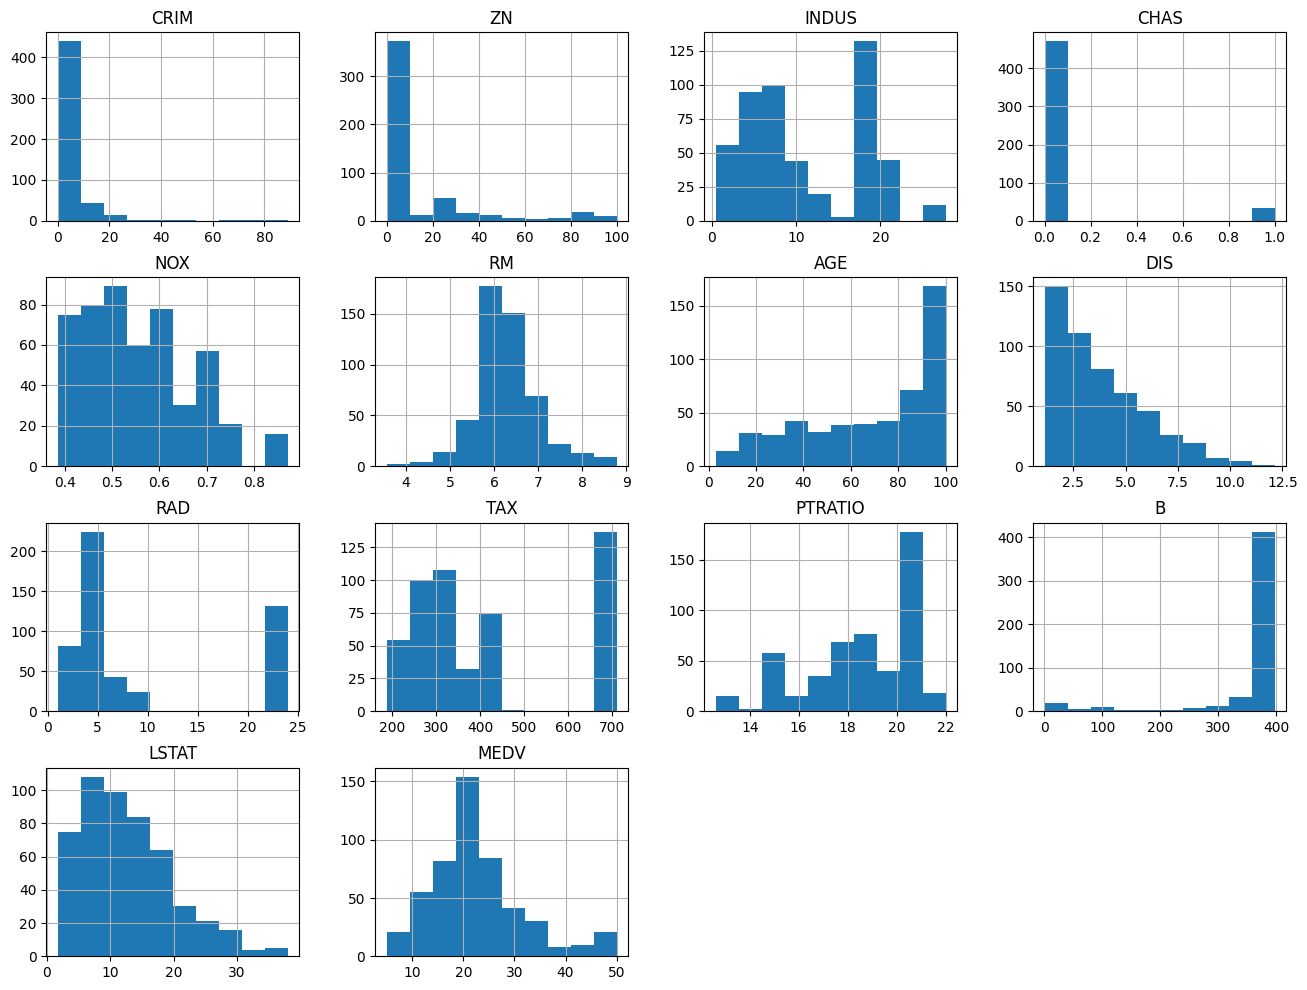

In [5]:
df.hist(figsize=(16, 12))

По гистограмам можем сказать, что только столбец RM имеет схожесть с нормальным распределением

In [6]:
for column in df.columns:
    shapiro_result = shapiro(df[column])
    print(f"ShapiroResult for column '{column}': {shapiro_result.pvalue}")

ShapiroResult for column 'CRIM': 1.3285893795939685e-36
ShapiroResult for column 'ZN': 7.882830475544967e-34
ShapiroResult for column 'INDUS': 1.0646987056818077e-17
ShapiroResult for column 'CHAS': 2.3505073051297636e-40
ShapiroResult for column 'NOX': 5.776225084930437e-14
ShapiroResult for column 'RM': 2.411976537849353e-10
ShapiroResult for column 'AGE': 2.2307656987054624e-18
ShapiroResult for column 'DIS': 2.1853900691469938e-17
ShapiroResult for column 'RAD': 8.073212977088302e-30
ShapiroResult for column 'TAX': 1.1627808856582329e-23
ShapiroResult for column 'PTRATIO': 2.3606494426804705e-17
ShapiroResult for column 'B': 6.057660239173561e-36
ShapiroResult for column 'LSTAT': 8.286632334963697e-14
ShapiroResult for column 'MEDV': 4.941386258635722e-16


Можем сказать, что ни одно из значений не удовлетворяет нормально распределению так как p-value≤0,05

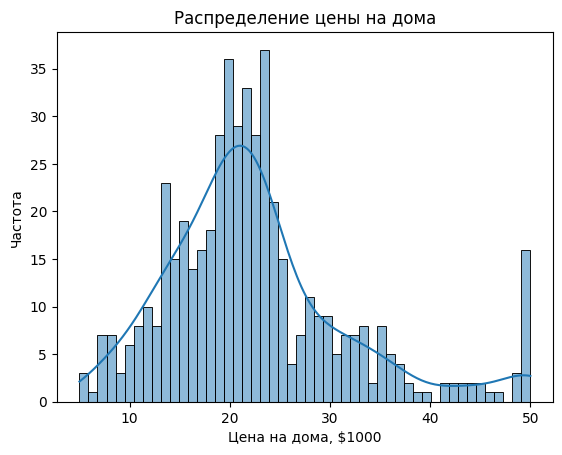

In [7]:
sns.histplot(df['MEDV'], bins=50, kde=True)
plt.title('Распределение цены на дома')
plt.xlabel('Цена на дома, $1000')
plt.ylabel('Частота')
plt.show()

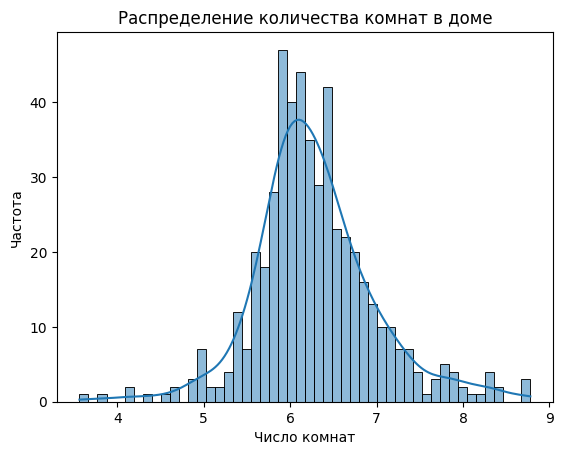

In [8]:
sns.histplot(df['RM'], bins=50, kde=True)
plt.title('Распределение количества комнат в доме')
plt.xlabel('Число комнат')
plt.ylabel('Частота')
plt.show()

Посчитаем коэффициент ассиметрии для выбранных столбцов<br>
<br>
Коэффициент асимметрии — величина, характеризующая асимметрию распределения данной случайной величины.

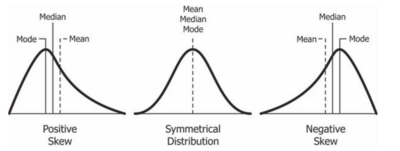

In [9]:
df[['MEDV', 'RM', 'B', 'LSTAT']].skew()

MEDV     1.108098
RM       0.403612
B       -2.890374
LSTAT    0.906460
dtype: float64

Посчитаем коэффициент эксцесса<br>
<br>
Коэффициент эксцесса — мера остроты пика распределения случайной величины.

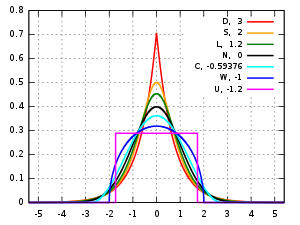

In [10]:
df[['MEDV', 'RM', 'B', 'LSTAT']].kurtosis()

MEDV     1.495197
RM       1.891500
B        7.226818
LSTAT    0.493240
dtype: float64

Построим тепловую карту корреляции для нашего датасета. Значения на границах -1, 1 - выше линейная зависимость параметров, значения около 0 - низкая зависимость параметров

<Axes: >

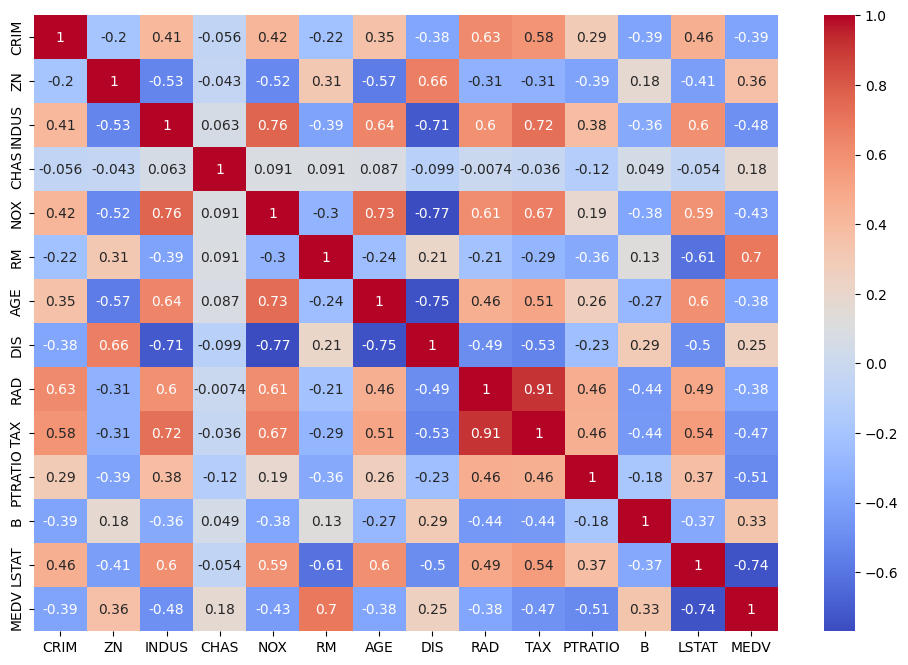

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Для нас наиболее интересным является последняя строка, которая показывает корреляцию с ценой дома. Наиболее влиятельные параметры: LSTAT и RM

Построим графики корреляции этих параметров

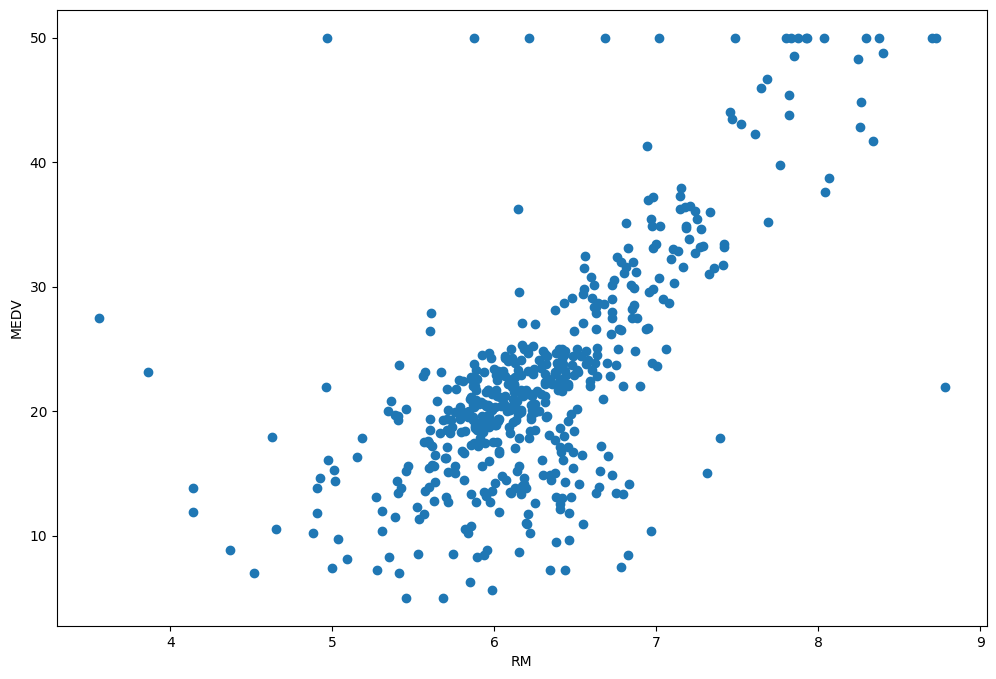

In [12]:
plt.figure(figsize=(12, 8))
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.plot(df['RM'], df['MEDV'], 'o')

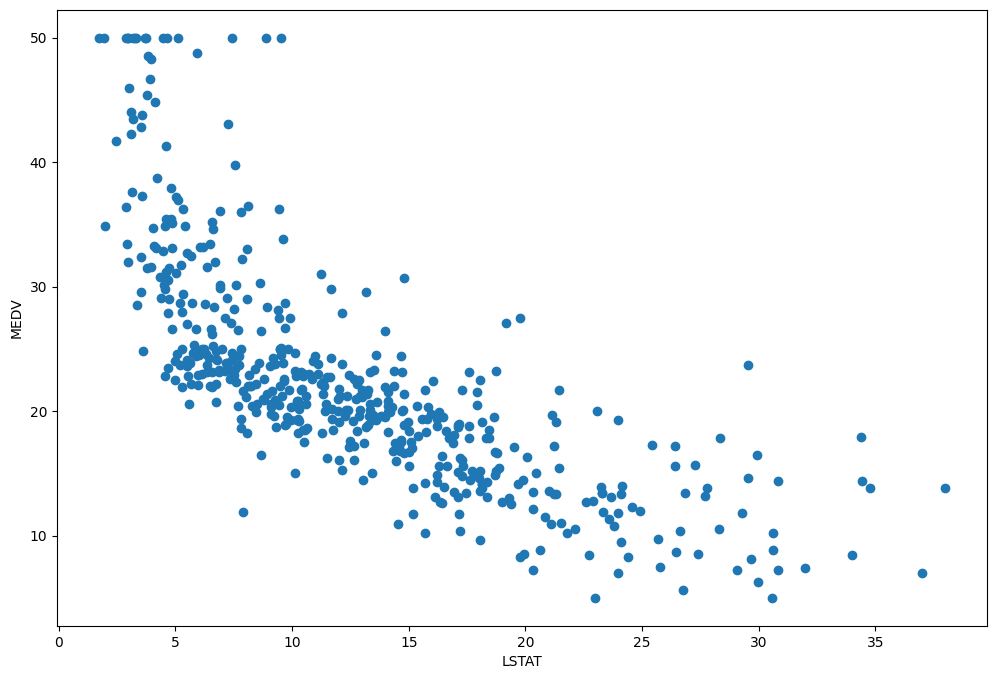

In [13]:
plt.figure(figsize=(12, 8))
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.plot(df['LSTAT'], df['MEDV'], 'o')

Используем технику снижения размерности: PCA - метод главных компонент, для просмотра линейной зависимости

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X = scaler.fit_transform(df.copy())
y = df['MEDV'].values

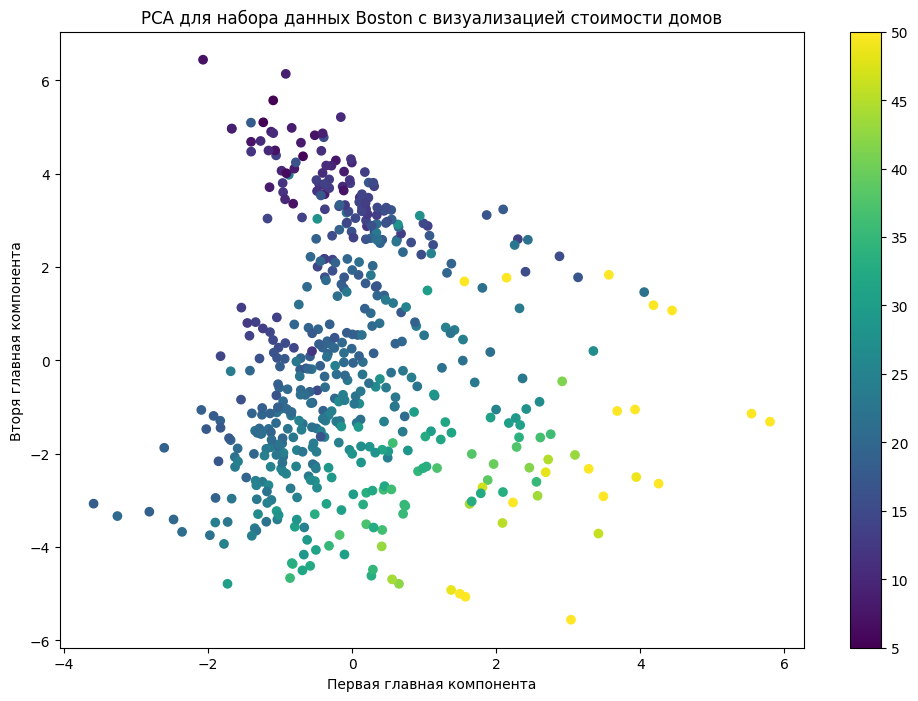

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 1], X_pca[:, 0], c=y)
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторя главная компонента')
plt.title('PCA для набора данных Boston с визуализацией стоимости домов')
plt.colorbar(scatter)
plt.show()

### Обучим модель линейной регрессии

In [17]:
scaler = StandardScaler()
model = LinearRegression()


df.drop(['CHAS', 'RAD', 'CRIM', 'B'], axis=1, inplace=True)

df[df.columns.difference(['MEDV'])] = scaler.fit_transform(df[df.columns.difference(['MEDV'])]) 
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

model.fit(X, y)

LinearRegression()

Визуализируем параметры для моделей 

Коэффициенты признаков:  [ 0.89860762 -0.16756459 -1.79535099  2.80328104  0.0643136  -3.05094534
 -0.4194053  -1.89746647 -4.14100138]
Свободный член:  22.532806324110673


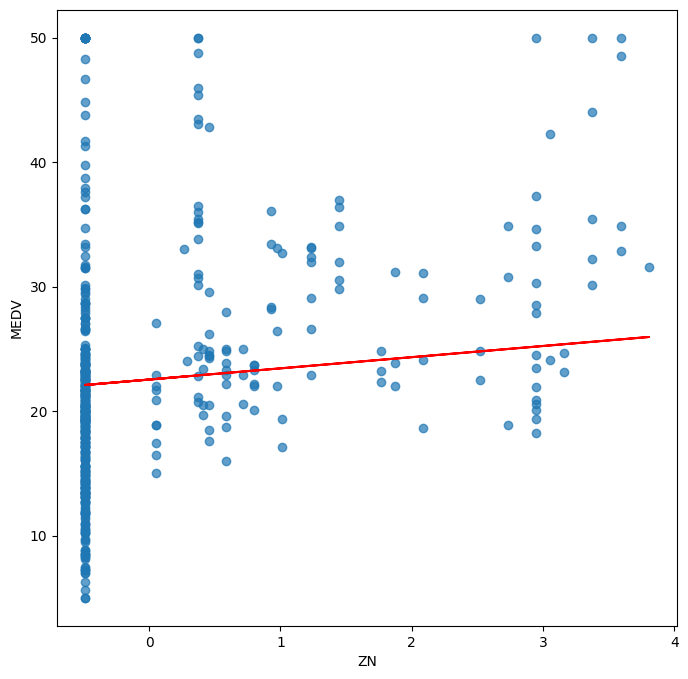

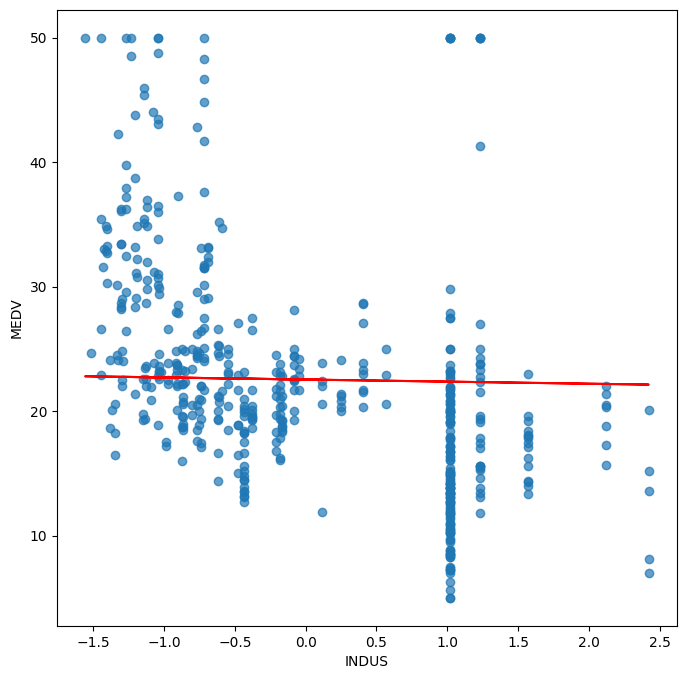

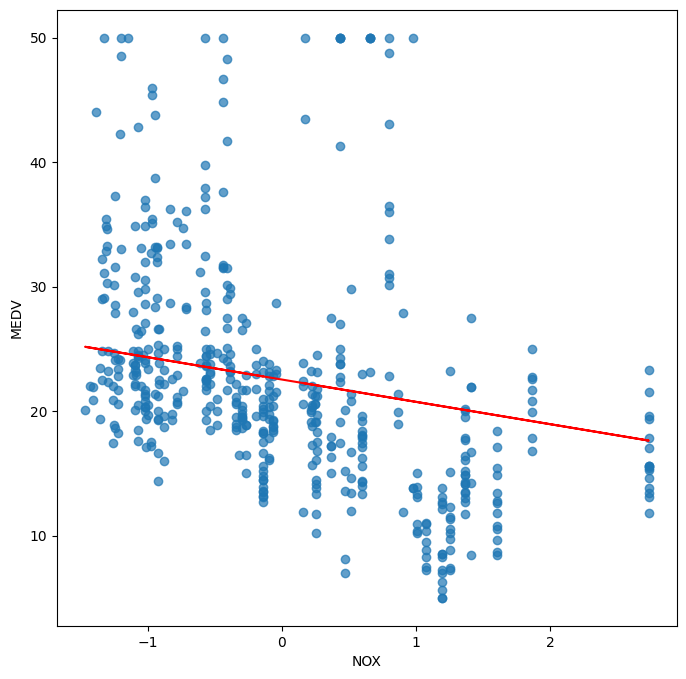

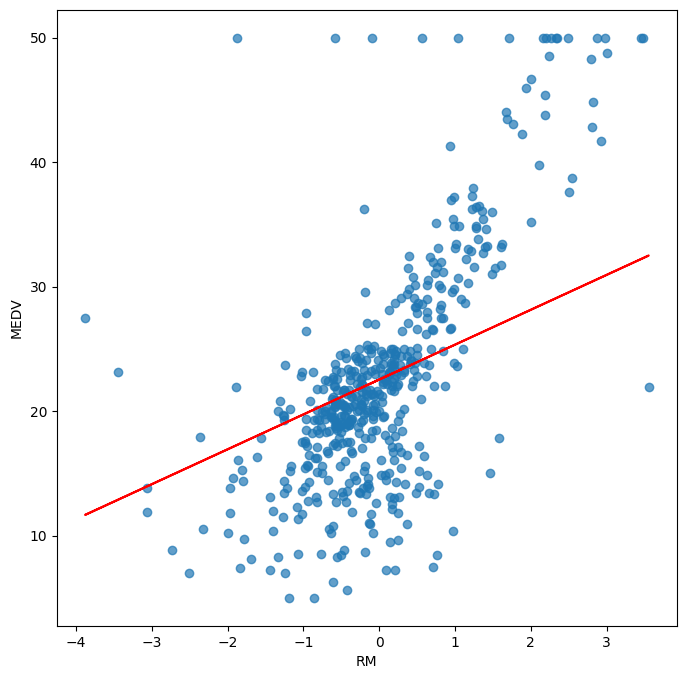

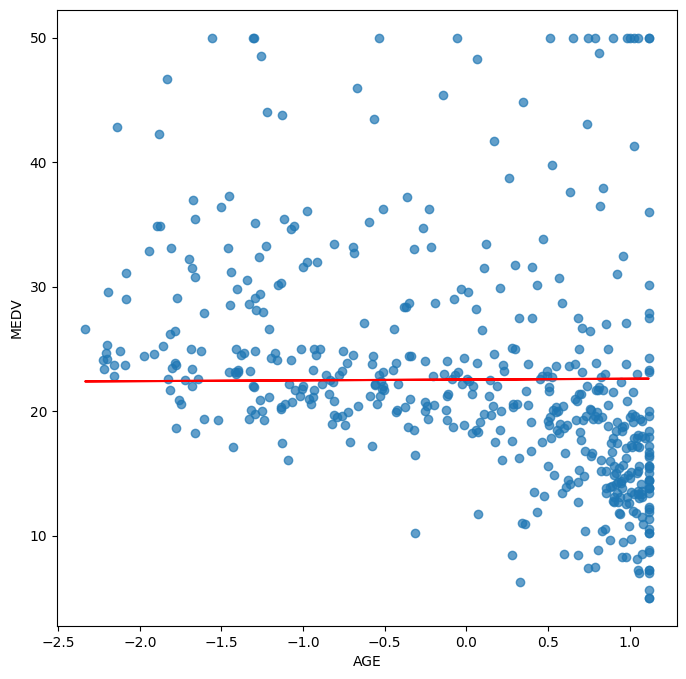

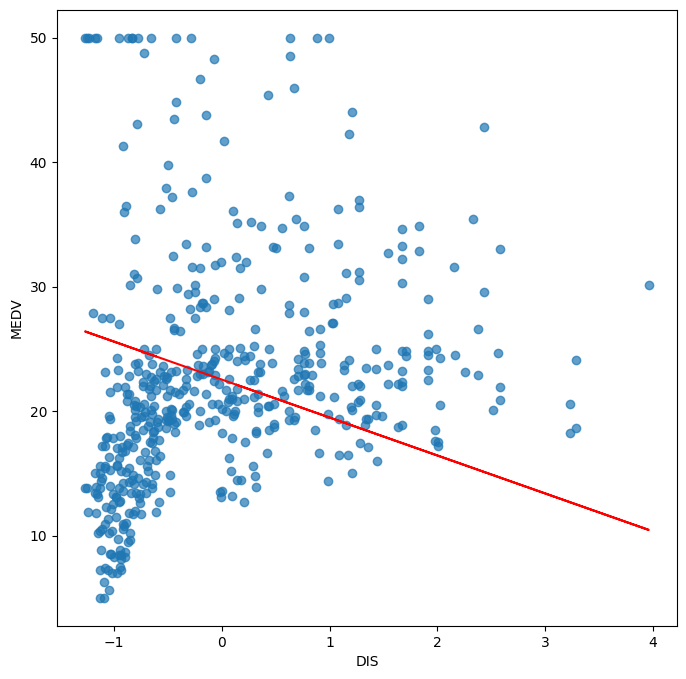

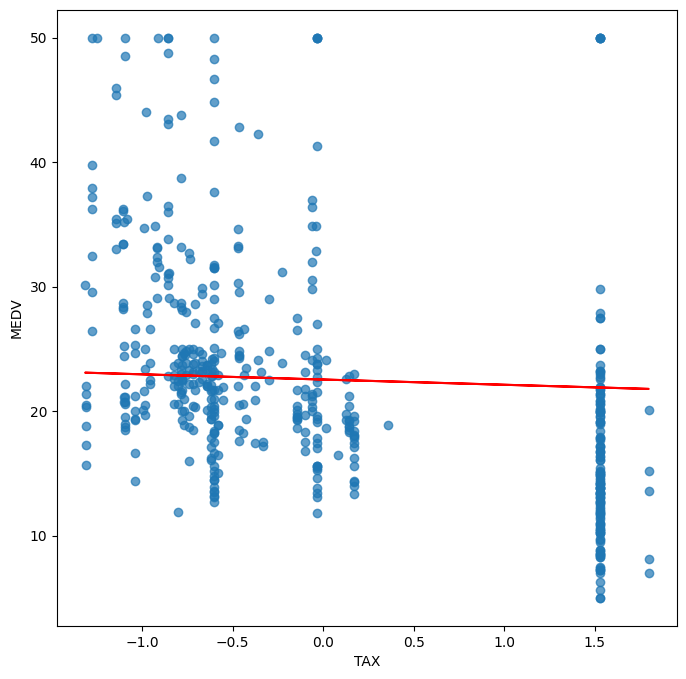

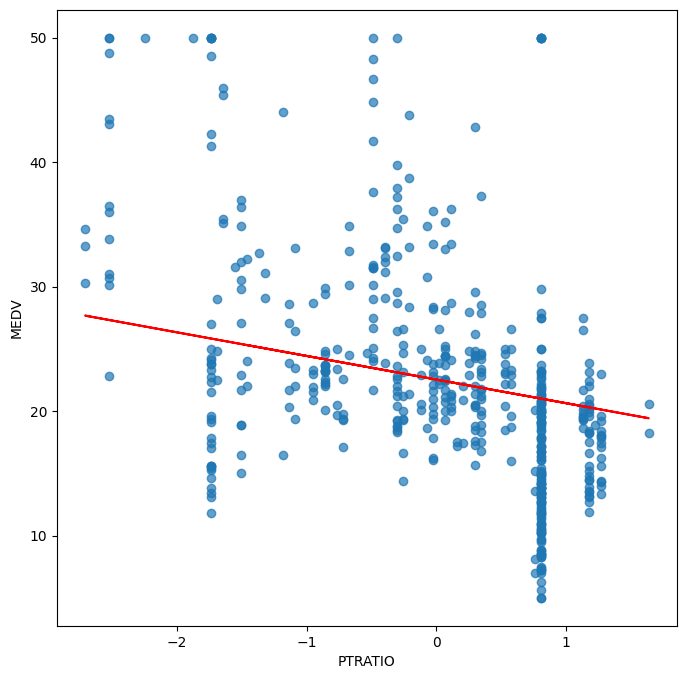

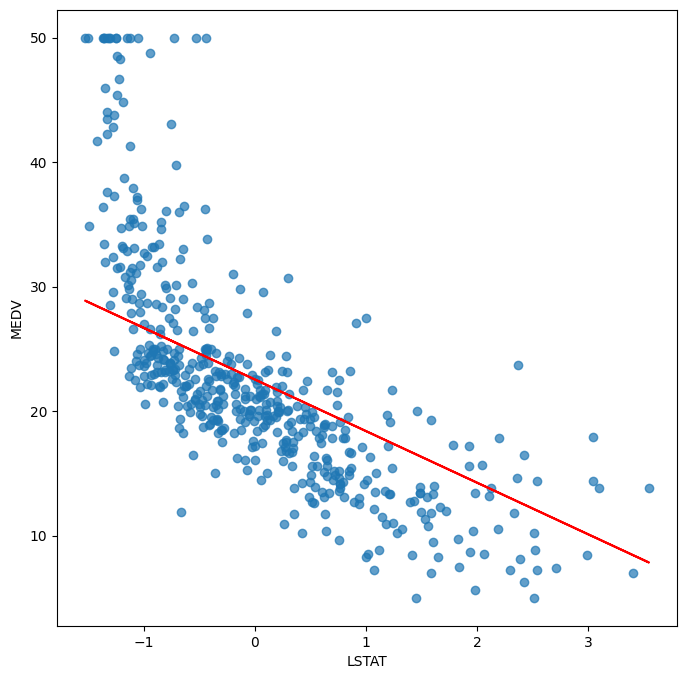

In [18]:
a = model.coef_
print('Коэффициенты признаков: ', a)
b = model.intercept_
print('Свободный член: ', b)

for column in df.columns:
    if column != 'MEDV':
        plt.figure(figsize=(8, 8))
        plt.scatter(df[column], df['MEDV'], alpha=0.7)
        plt.xlabel(column)
        plt.ylabel('MEDV')
        
        a = model.coef_[df.columns.get_loc(column)]
        b = model.intercept_ 
        x = df[column]
        y = a * x + b
        plt.plot(x, y, color='red')
        
        plt.show()